<a href="https://colab.research.google.com/github/THANOS-555/project-24bct061/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from google.colab import files

In [4]:
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())

Saving fraudTest.csv to fraudTest.csv
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F      

In [6]:
print(df.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [10]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]


In [11]:
X = X.select_dtypes(include=['int64', 'float64'])

print("\n Using only numeric columns for model:")
print(X.columns)


✔ Using only numeric columns for model:
Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long'],
      dtype='object')


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [15]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


In [20]:
p13rint("\nEnter transaction values to predict:")
sample = []

for col in X.columns:
    value = float(input(f"Enter value for {col}: "))
    sample.append(value)

result = predict_fraud(sample)
print("\nPrediction:", result)



Enter transaction values to predict:
Enter value for Unnamed: 0: 100000
Enter value for cc_num: 10000
Enter value for amt: 1000
Enter value for zip: 123654
Enter value for lat: 784512
Enter value for long: 23654
Enter value for city_pop: 147852
Enter value for unix_time: 1478
Enter value for merch_lat: 69852
Enter value for merch_long: 369874

Prediction: FRAUD


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


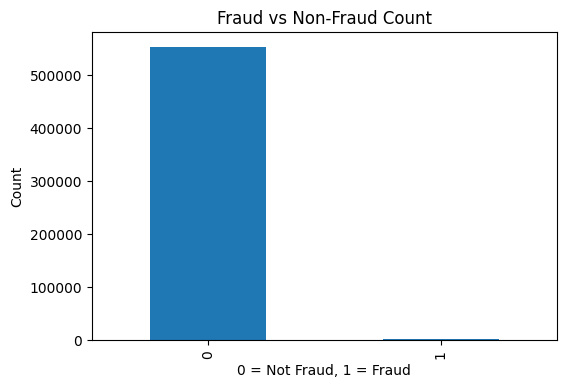

In [21]:
plt.figure(figsize=(6,4))
df["is_fraud"].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Count")
plt.xlabel("0 = Not Fraud, 1 = Fraud")
plt.ylabel("Count")
plt.show()

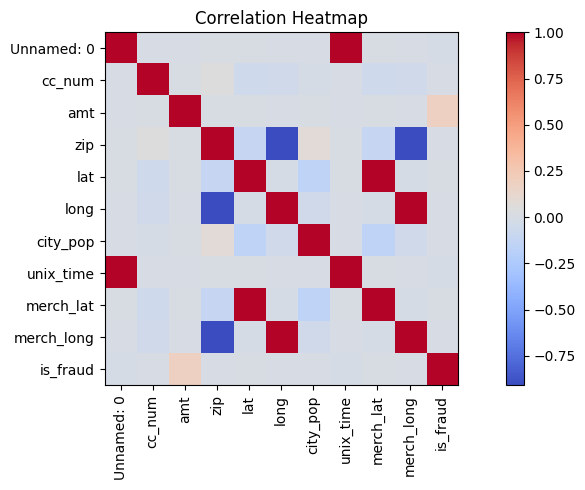

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()